<a href="https://colab.research.google.com/github/AkalaponCh/Machine-Learning/blob/main/Anomaly_Detection_in_Manufacturing_Data/Anomaly_Detection_in_Manufacturing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [2]:
df = pd.read_csv('/content/Manufacturing_dataset.csv')

df.head()

,Timestamp,Temperature (°C),Machine Speed (RPM),Production Quality Score,Vibration Level (mm/s),Energy Consumption (kWh),Optimal Conditions
0,2025-04-01 08:00:00,78.92,1461,8.49,0.07,1.97,0
1,2025-04-01 08:01:00,71.83,1549,8.97,0.04,1.01,0
2,2025-04-01 08:02:00,74.88,1498,8.52,0.08,1.60,0
3,2025-04-01 08:03:00,77.27,1478,8.28,0.09,1.87,0
4,2025-04-01 08:04:00,76.50,1524,8.07,0.04,1.53,0


# **Preprocessing**

In [3]:
#Check data types
print(df.info())

#Check column name
print("\nColumn Name:",df.columns)

#Get basic descriptive statistics
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 10000 non-null  object 
 1   Temperature (°C)          10000 non-null  float64
 2   Machine Speed (RPM)       10000 non-null  int64  
 3   Production Quality Score  10000 non-null  float64
 4   Vibration Level (mm/s)    10000 non-null  float64
 5   Energy Consumption (kWh)  10000 non-null  float64
 6   Optimal Conditions        10000 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 547.0+ KB
None

Column Name: Index(['Timestamp', 'Temperature (°C)', 'Machine Speed (RPM)',
       'Production Quality Score', 'Vibration Level (mm/s)',
       'Energy Consumption (kWh)', 'Optimal Conditions'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
Temperature (°C),10000.0,74.989407,1.985371,67.58,73.66,75.00,76.34,82.47
Machine Speed (RPM),10000.0,1499.562400,29.059738,1450.00,1474.00,1500.00,1525.00,1549.00
Production Quality Score,10000.0,8.500839,0.287774,8.00,8.25,8.50,8.75,9.00
Vibration Level (mm/s),10000.0,0.065218,0.020607,0.03,0.05,0.07,0.08,0.10
Energy Consumption (kWh),10000.0,1.499053,0.288139,1.00,1.25,1.50,1.75,2.00
Optimal Conditions,10000.0,0.096600,0.295427,0.00,0.00,0.00,0.00,1.00


# **Exploratory Data Analysis (EDA)**

In [4]:
# Convert 'Timestamp' to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

In [5]:
# Sort by index to ensure chronological order
df = df.sort_index()

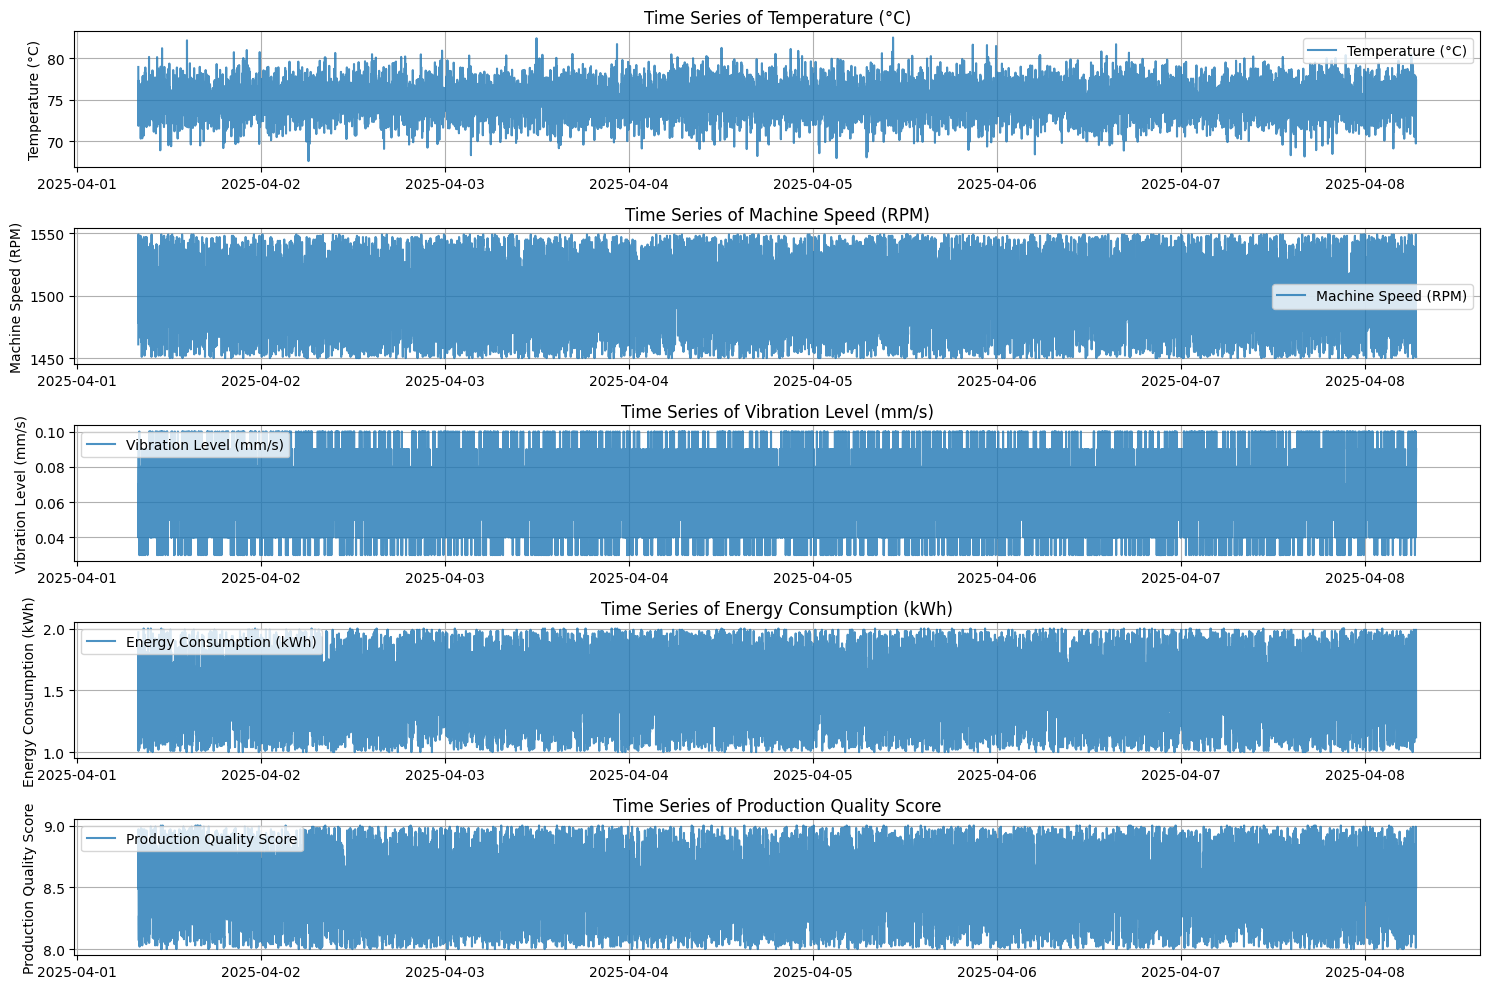

In [6]:
# Plotting individual features
sensor_columns = ['Temperature (°C)', 'Machine Speed (RPM)', 'Vibration Level (mm/s)','Energy Consumption (kWh)', 'Production Quality Score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(sensor_columns):
    plt.subplot(len(sensor_columns), 1, i + 1)
    plt.plot(df.index, df[col], label=col, alpha=0.8)
    plt.title(f'Time Series of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

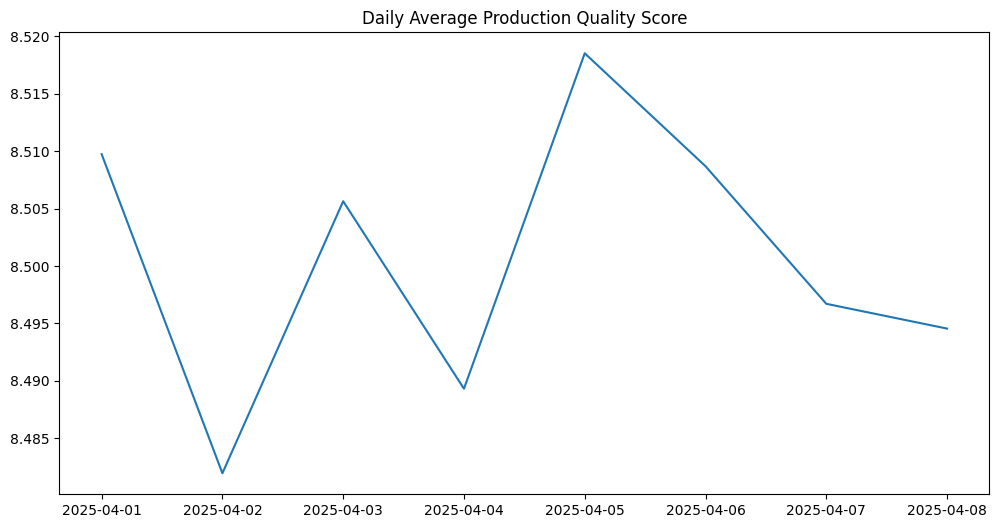

In [7]:
#Daily Average
df_daily_avg = df[sensor_columns].resample('D').mean()
plt.figure(figsize=(12, 6))
plt.plot(df_daily_avg.index, df_daily_avg['Production Quality Score'])
plt.title('Daily Average Production Quality Score')
plt.show()

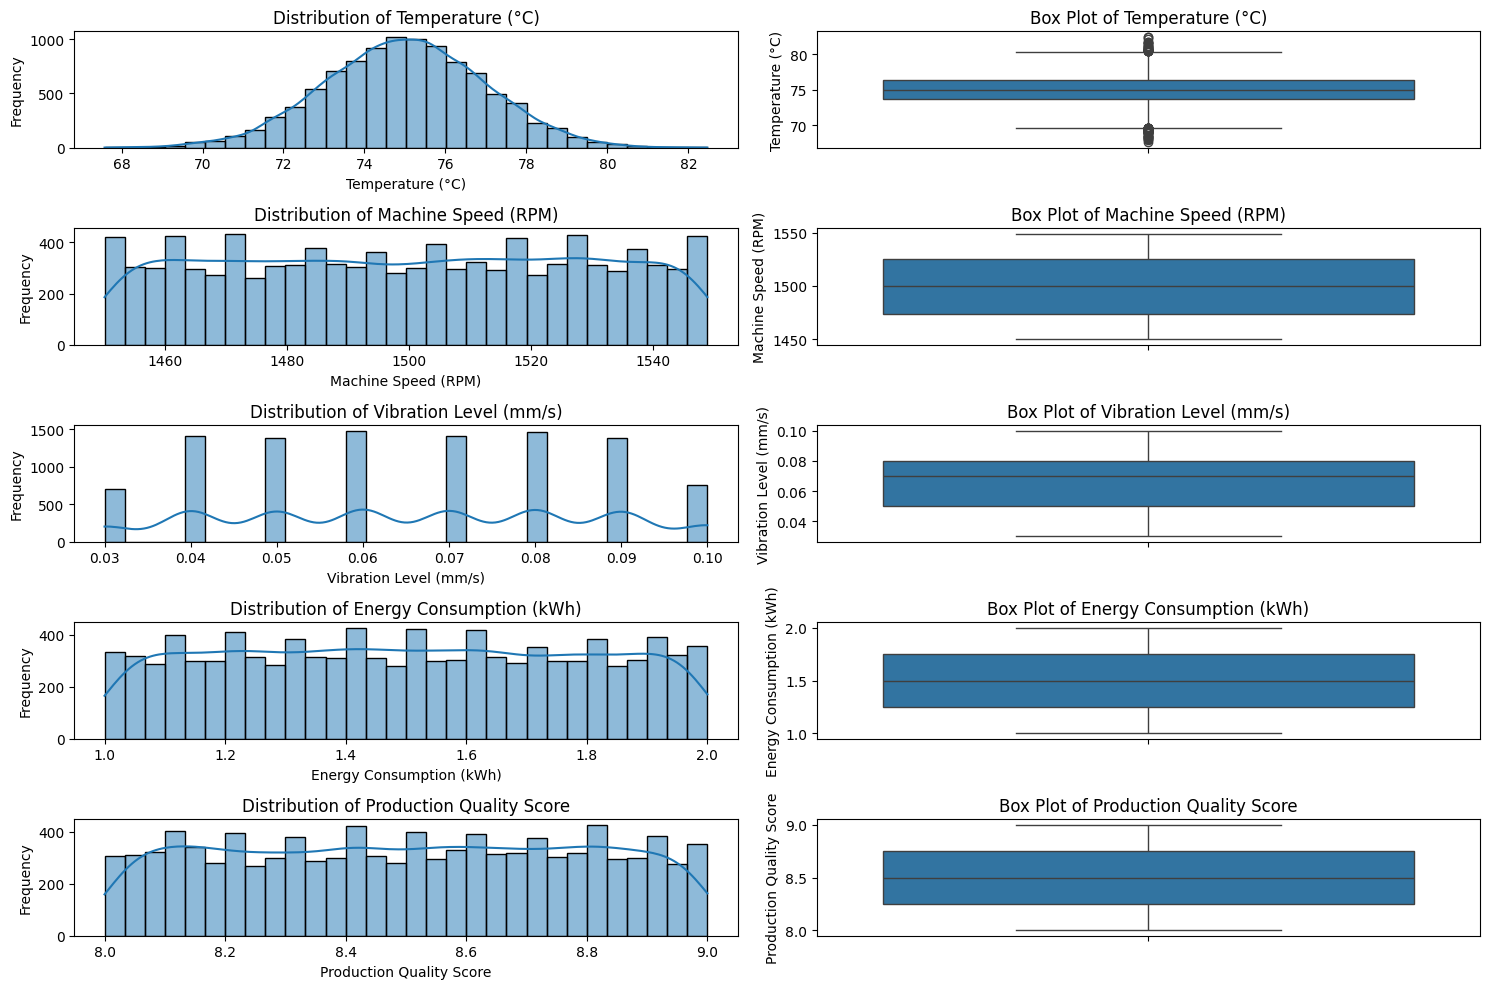

In [8]:
# Distribution Analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(sensor_columns):
    plt.subplot(len(sensor_columns), 2, 2*i + 1) # Subplot for histogram
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

    plt.subplot(len(sensor_columns), 2, 2*i + 2) # Subplot for boxplot
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

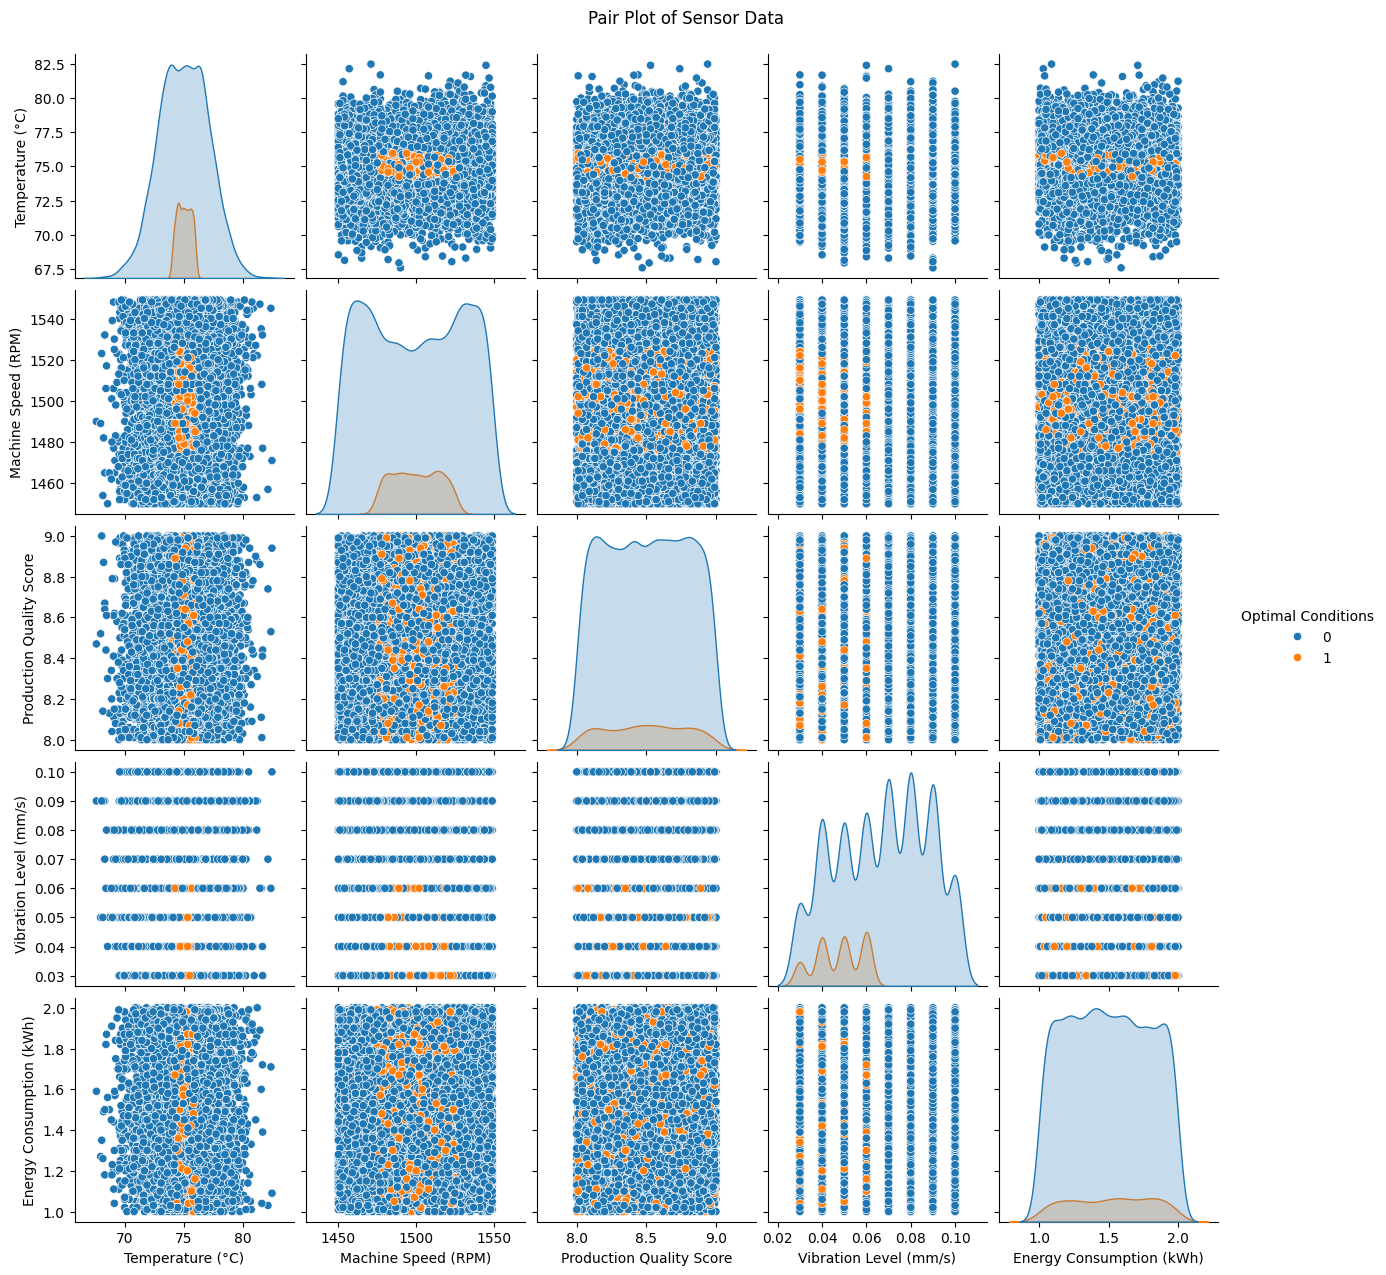

In [9]:
sns.pairplot(df, hue='Optimal Conditions', diag_kind='kde')
plt.suptitle(f'Pair Plot of Sensor Data', y=1.02)
plt.show()

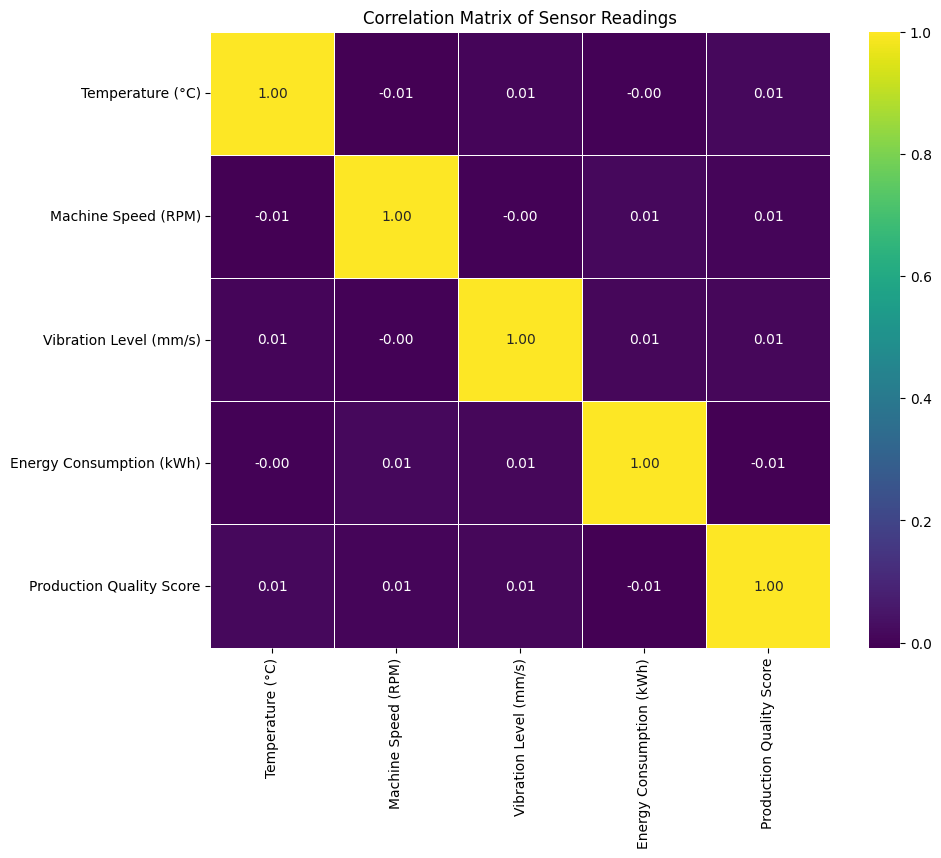

In [10]:
# Correlation Analysis
correlation_matrix = df[sensor_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Sensor Readings')
plt.show()

# **Anomaly Detection Implementation**

**Z-Score Method**

In [11]:
from scipy import stats

z_threshold = 3

for col in sensor_columns:
    # Calculate Z-score for the column
    df[f'{col}_zscore_value'] = np.abs(stats.zscore(df[col]))

    # Flag as anomaly if absolute Z-score exceeds threshold
    df.loc[df[f'{col}_zscore_value'] > z_threshold, f'{col}_zscore_anomaly'] = 1
    print(f"  - {col}: {df[f'{col}_zscore_anomaly'].sum()} anomalies detected (Z-score)")

  - Temperature (°C): 29.0 anomalies detected (Z-score)
  - Machine Speed (RPM): 0.0 anomalies detected (Z-score)
  - Vibration Level (mm/s): 0.0 anomalies detected (Z-score)
  - Energy Consumption (kWh): 0.0 anomalies detected (Z-score)
  - Production Quality Score: 0.0 anomalies detected (Z-score)


**Isolation Forest Method**

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

contamination_rate = 0.01

for col in sensor_columns:
    # Reshape the data for Isolation Forest (needs 2D array)
    X = df[[col]].values

    # Scale data before Isolation Forest
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    iso_forest = IsolationForest(contamination=contamination_rate, random_state=42, n_estimators=100)
    df[f'{col}_isoforest_prediction'] = iso_forest.fit_predict(X_scaled)
    # Convert -1 (outlier) to 1 (anomaly) and 1 (inlier) to 0 (no anomaly)
    df[f'{col}_isoforest_anomaly'] = df[f'{col}_isoforest_prediction'].apply(lambda x: 1 if x == -1 else 0)
    print(f"  - {col}: {df[f'{col}_isoforest_anomaly'].sum()} anomalies detected (Isolation Forest)")

  - Temperature (°C): 100 anomalies detected (Isolation Forest)
  - Machine Speed (RPM): 0 anomalies detected (Isolation Forest)
  - Vibration Level (mm/s): 0 anomalies detected (Isolation Forest)
  - Energy Consumption (kWh): 55 anomalies detected (Isolation Forest)
  - Production Quality Score: 98 anomalies detected (Isolation Forest)


**Residual Method (using Rolling Mean)**

In [13]:
window_size = 24
residual_threshold_multiplier = 3

for col in sensor_columns:
    # Calculate rolling mean (forecast)
    # .shift(1) ensures we use past data to predict current, avoiding data leakage
    df[f'{col}_rolling_mean'] = df[col].rolling(window=window_size).mean().shift(1)

    # Calculate residuals (actual - predicted)
    df[f'{col}_residuals'] = df[col] - df[f'{col}_rolling_mean']

    # Calculate rolling standard deviation of residuals
    df[f'{col}_residual_std'] = df[f'{col}_residuals'].rolling(window=window_size).std().shift(1)

    # Flag anomaly if residual is more than N standard deviations away from 0
    # Add a small epsilon to avoid division by zero if std is 0
    df.loc[np.abs(df[f'{col}_residuals']) > (residual_threshold_multiplier * (df[f'{col}_residual_std'] + 1e-6)),
           f'{col}_residual_anomaly'] = 1
    print(f"  - {col}: {df[f'{col}_residual_anomaly'].sum()} anomalies detected (Residual)")

  - Temperature (°C): 74.0 anomalies detected (Residual)
  - Machine Speed (RPM): 0.0 anomalies detected (Residual)
  - Vibration Level (mm/s): 0.0 anomalies detected (Residual)
  - Energy Consumption (kWh): 2.0 anomalies detected (Residual)
  - Production Quality Score: 1.0 anomalies detected (Residual)


# **Visualization**

**Plot Function**

In [14]:
def plot_anomalies(df, col, anomaly_method_cols, title):
    plt.figure(figsize=(18, 7))
    plt.plot(df.index, df[col], label='Original Data', color='blue', alpha=0.7)

    colors = ['red', 'green', 'purple']
    markers = ['o', 'x', 's']

    for i, anomaly_col in enumerate(anomaly_method_cols):
        anomalies = df[df[anomaly_col] == 1]
        if not anomalies.empty:
            # Extract method name from column for legend
            method_name = anomaly_col.replace('_anomaly', '').replace(col + '_', '')
            plt.scatter(anomalies.index, anomalies[col],
                        color=colors[i % len(colors)],
                        marker=markers[i % len(markers)],
                        s=50, label=f'Anomaly ({method_name})',
                        alpha=0.8, zorder=5)

    plt.title(title, fontsize=16)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

**Generate Plot**


--- Generating Plots for All Sensor Columns ---


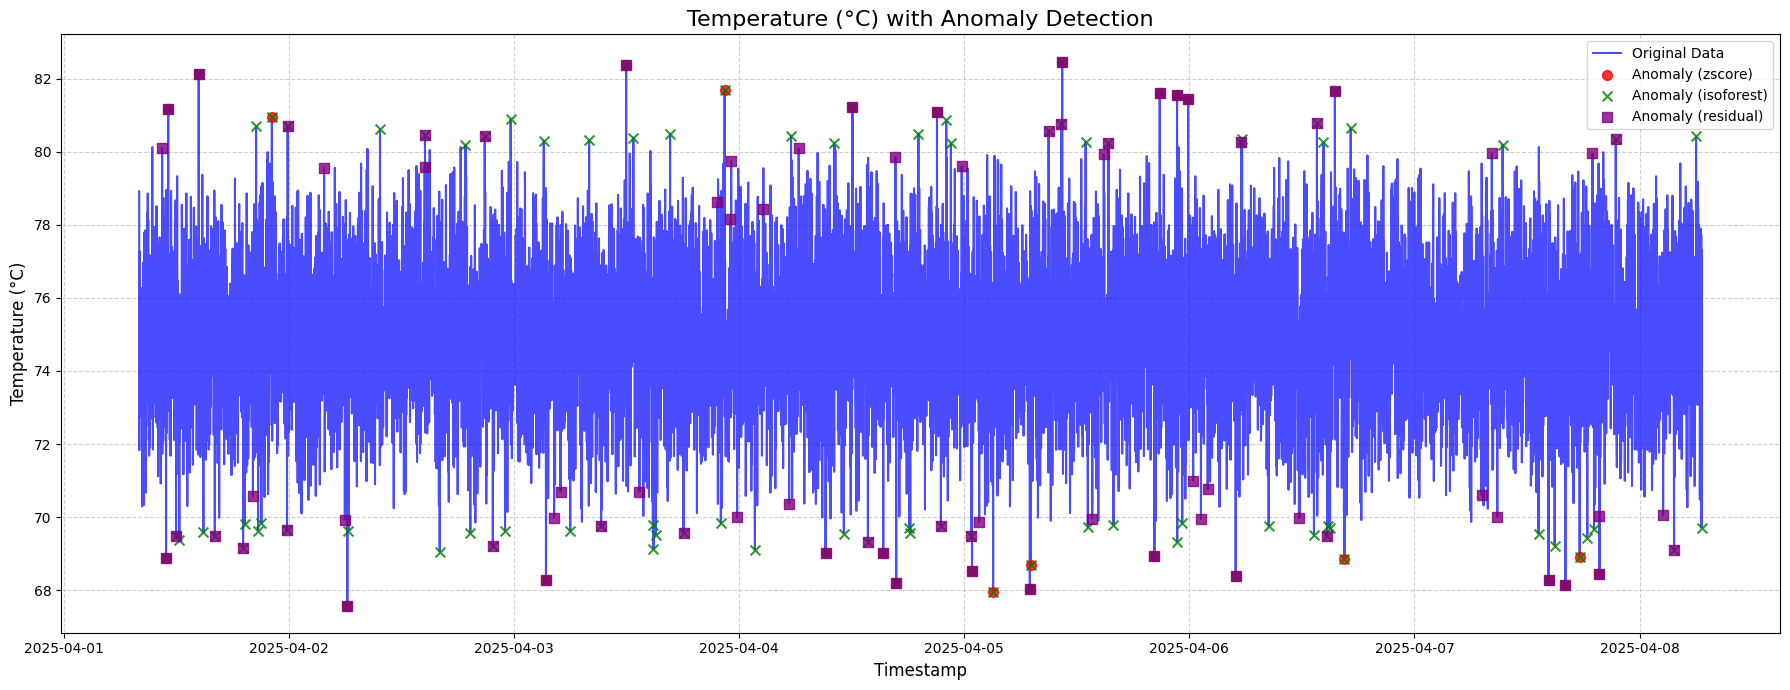

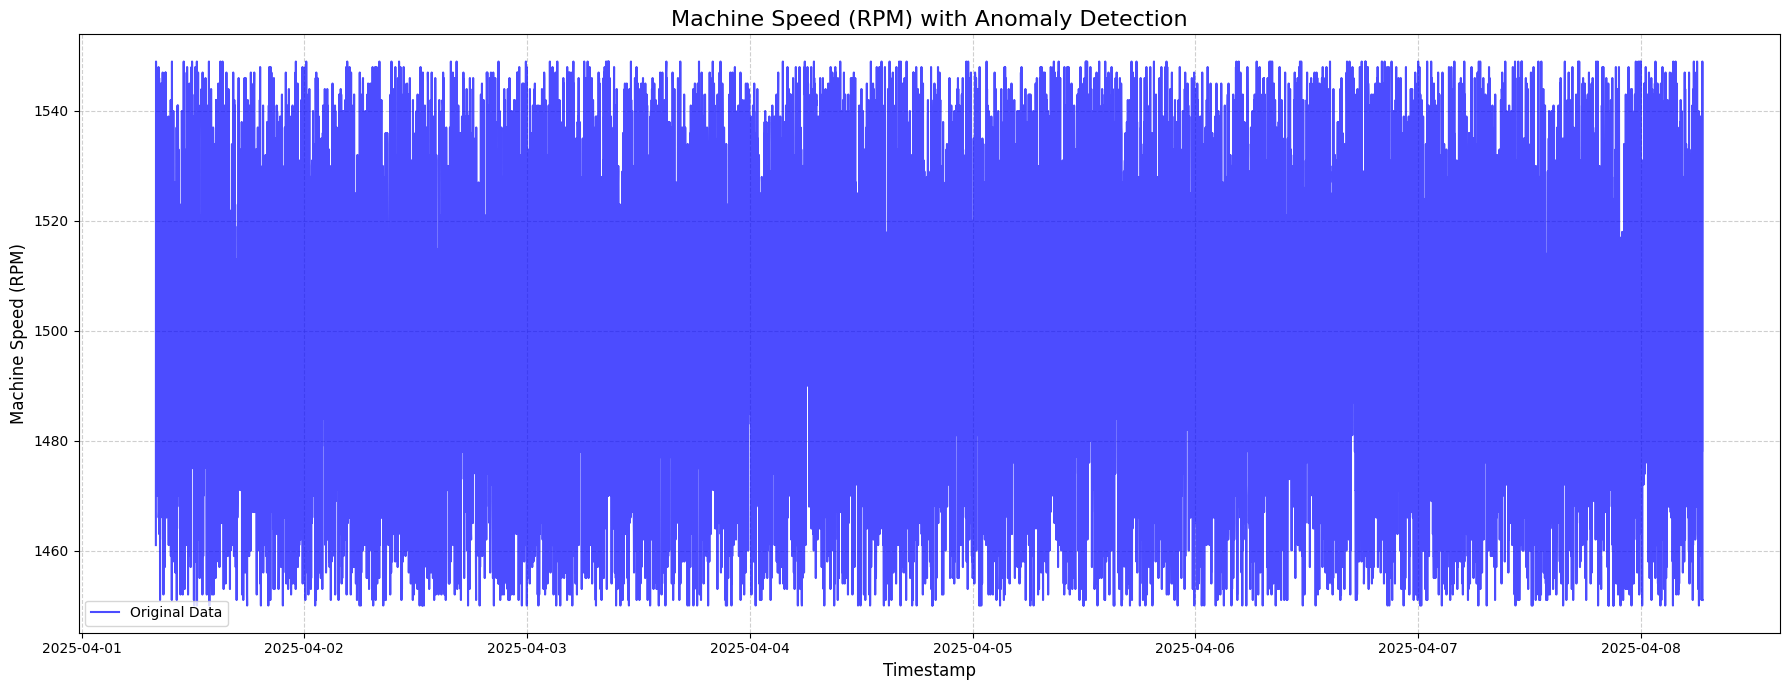

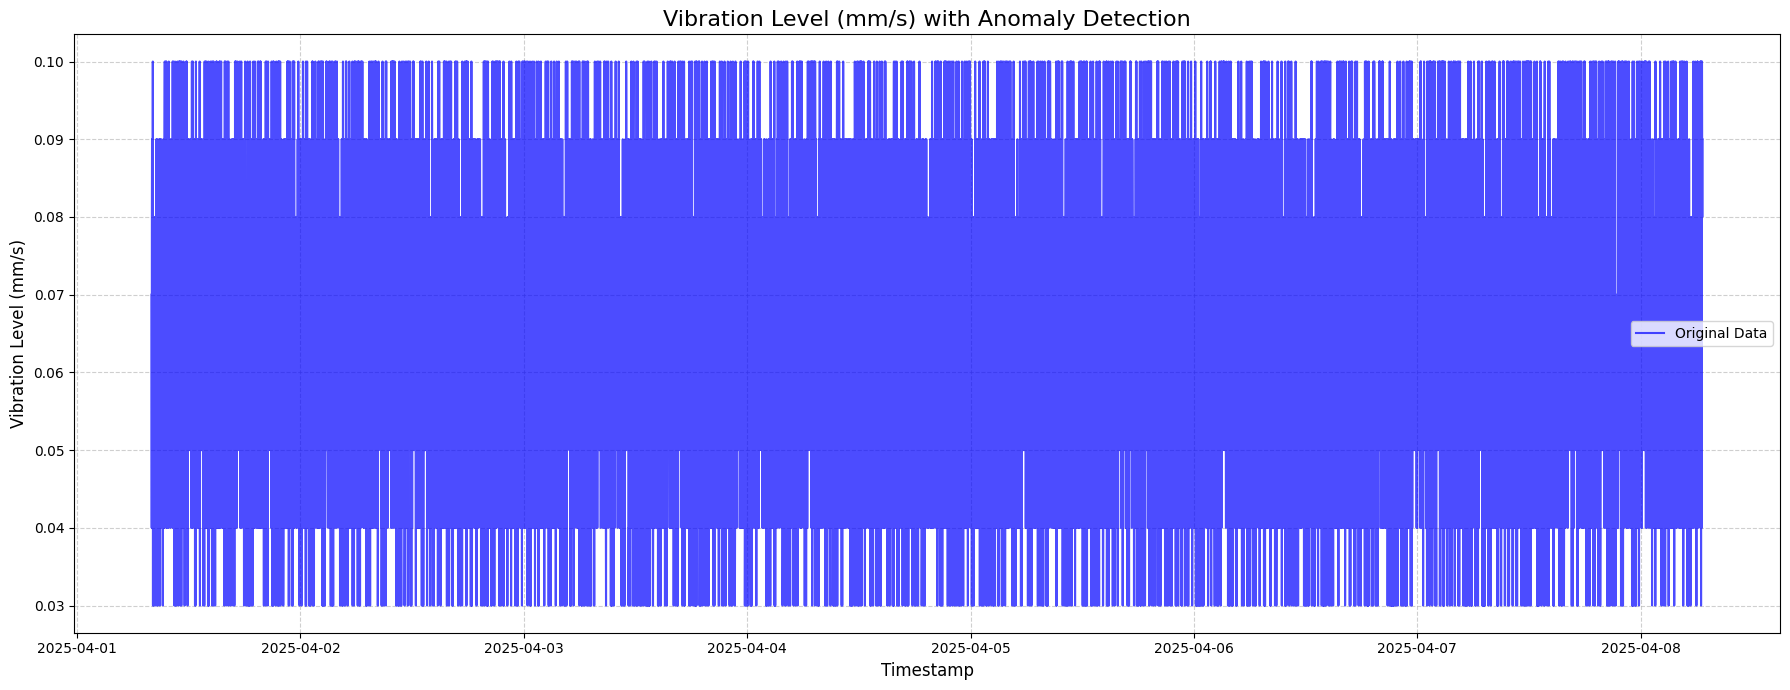

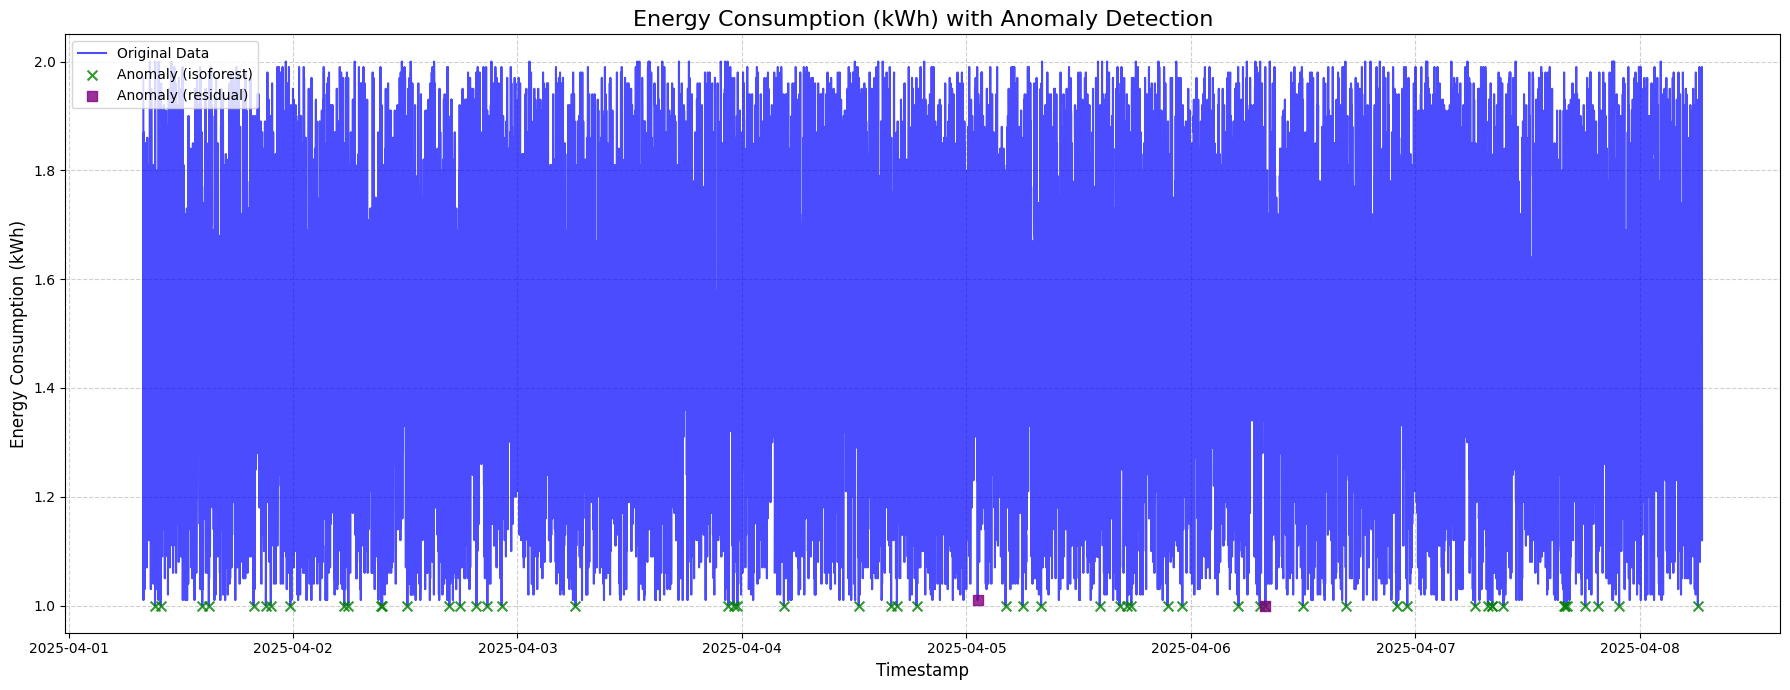

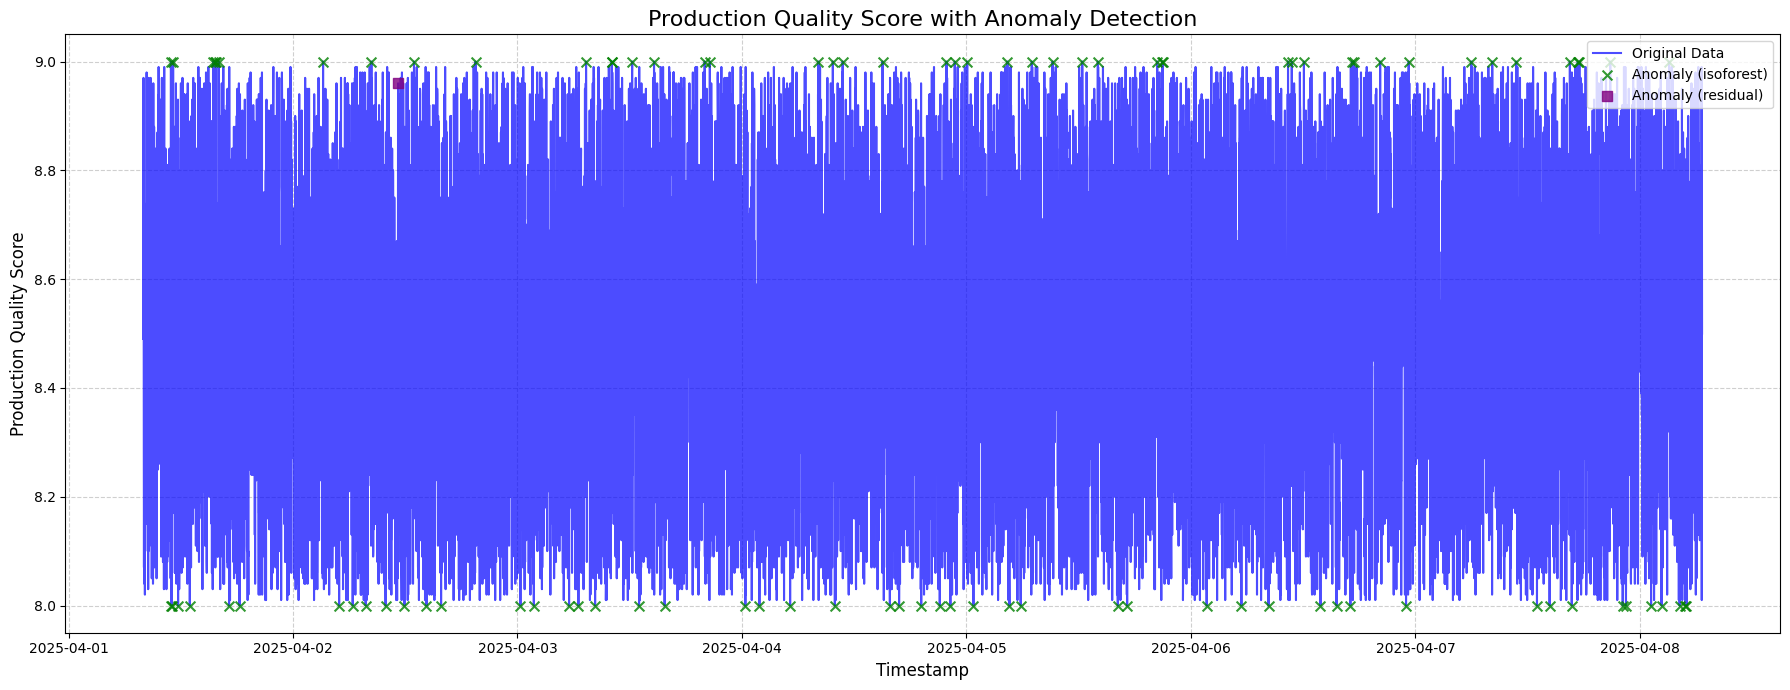


All plots generated. Review them to see the detected anomalies for each sensor.


In [15]:
print("\n--- Generating Plots for All Sensor Columns ---")
for sensor_col in sensor_columns:
    current_anomaly_cols = [
        f'{sensor_col}_zscore_anomaly',
        f'{sensor_col}_isoforest_anomaly',
        f'{sensor_col}_residual_anomaly'
    ]

    # Check if all anomaly columns were successfully created for the current sensor
    if all(col in df.columns for col in current_anomaly_cols):
        plot_anomalies(df, sensor_col, current_anomaly_cols, f'{sensor_col} with Anomaly Detection')
    else:
        print(f"\nWarning: Could not plot all anomaly types for {sensor_col}. Some columns might be missing or empty.")

print("\nAll plots generated. Review them to see the detected anomalies for each sensor.")